# 🧑‍🎨Part 3: State of Art Comparison

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/financial_phrasebank_sentences_50agree.csv")
df.head()

,sentence,label
0,"According to Gran , the company has no plans t...",1
1,Technopolis plans to develop in stages an area...,1
2,The international electronic industry company ...,0
3,With the new production plant the company woul...,2
4,According to the company 's updated strategy f...,2


In [7]:
from sklearn.model_selection import train_test_split

X_text, y = df["sentence"].values, df["label"].values
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, stratify=y, random_state=42)



In [8]:
def train_model(X_train, y_train):
    model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [9]:
# Train the model using different fractions of training data
fractions = [0.01, 0.10, 0.25, 0.50, 0.75, 1.00]
results = {}

In [10]:
for frac in fractions:
    if frac < 1.0:
        X_train_frac, _, y_train_frac, _ = train_test_split(
            X_train, y_train, train_size=frac, stratify=y_train, random_state=42)
    else:
        X_train_frac, y_train_frac = X_train, y_train  # use full training set

    model = train_model(X_train_frac, y_train_frac)
    acc = evaluate_model(model, X_test, y_test)
    results[int(frac * 100)] = acc * 100  # store accuracy as percentage

# Step 5: Store results in a DataFrame
df_learning_curve = pd.DataFrame({
    "Training data percentage": list(results.keys()),
    "Accuracy (%)": list(results.values())
})

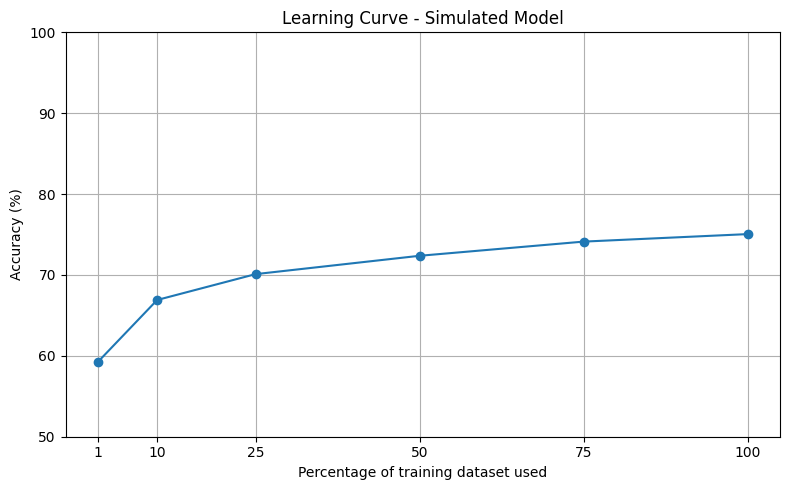

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(df_learning_curve["Training data percentage"],
         df_learning_curve["Accuracy (%)"], marker='o')
plt.title("Learning Curve - Simulated Model")
plt.xlabel("Percentage of training dataset used")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.xticks(df_learning_curve["Training data percentage"])
plt.ylim(50, 100)
plt.tight_layout()
plt.show()

In [15]:
# For local use in Jupyter/Colab
df_learning_curve  # This will display the DataFrame below the cell


,Training data percentage,Accuracy (%)
0,1,59.278351
1,10,66.907216
2,25,70.103093
3,50,72.371134
4,75,74.123711
5,100,75.051546
